# Example of MetaX in `Command-line`

Set the path of the MetaX folder in the `PATH` environment variable.

In [10]:
import sys
import os
from pathlib import Path

myDir = os.getcwd()
parentDir = os.path.abspath(os.path.join(myDir, os.pardir))
sys.path.append(parentDir)

path = Path(parentDir)
a=str(path.parent.absolute())

sys.path.append(a)



Import the libraries from the MetaX folder

In [11]:
from metax.taxafunc_analyzer.analyzer import TaxaFuncAnalyzer

Create a new OTF object.

In [12]:
df_path = '../data/example_data/Example_OTF.tsv'
meta_path = '../data/example_data/Example_Meta.tsv'
sw = TaxaFuncAnalyzer(df_path, meta_path, any_df_mode=False)

original df shape: (5000, 249)
after remove all zero row: (4391, 249)


Set `function` and `multi tables` 


# set_multi_tables()
Sets multiple tables including Function table, Taxa table, and Taxa-Function table.

Parameters:
- `level (str)`: The taxonomic level to consider. Default is 's' (species).
- `func_threshold (float)`: The threshold for function proportion. Default is 1.00.
- `processing_after_sum (bool)`: Whether to perform data preprocessing after summing protein intensity. Default is False.
- `data_preprocess_params (dict)`: Parameters for data preprocessing. Default is {'normalize_method': None, 'transform_method': None,
                                    'batch_meta': None, 'outlier_detect_method': None, 'outlier_handle_method': None,
                                    'outlier_detect_by_group': None, 'outlier_handle_by_group': None, 'processing_order': None}.
- `peptide_num_threshold (dict)`: Thresholds for peptide numbers in Function table, Taxa table, and Taxa-Function table.
                                Default is {'taxa': 1, 'func': 1, 'taxa_func': 1}.
- `sum_protein (bool)`: Whether to sum protein intensity. Default is False.
- `sum_protein_params (dict)`: Parameters for summing protein intensity. Default is {'method': 'razor', 'by_sample': False,
                                'rank_method': 'unique_counts'}.


In [13]:
sw.set_func('KEGG_ko')

# sw.set_group('Person')
# sw.set_group('Person')
sw.set_multi_tables(level='s', data_preprocess_params = {'normalize_method': None, 'transform_method': "log10",
                                                            'batch_meta': None, 'outlier_detect_method': None,
                                                            'outlier_handle_method': None,
                                                            'outlier_detect_by_group': None,
                                                            'outlier_handle_by_group': None,
                                                            'processing_order': None},
                    peptide_num_threshold = {'taxa': 3, 'func': 1, 'taxa_func': 1},
                    sum_protein=False)
# sw.set_multi_tables(level='s', sum_protein=True, sum_protein_params= { 'method': 'razor', 'by_sample': False, 'rank_method': 'unique'})


[2024-07-10 16:33:43] Start to detect outlier...
outlier_method is not set, outlier detection did not perform.

[2024-07-10 16:33:43] Start to handle missing value...

No missing value, skip outlier handling
Data transformed by [log10]
normalize_method is not set, data normalization did not perform.
batch_meta is not set, Batch effect removal did not perform.

[2024-07-10 16:33:44] -----Data preprocessing finished.-----

Original data shape: (4391, 249)
Starting to set Function table...
Function number with prop >= [1.0], peptide_num >= [1]: 602
Starting to set Taxa table...
Remove the peptides with 's__'in Taxon column...
Rmoved: [47], Left: [1972]
Taxa number with 's' level, peptide_num >= [3]: 132
Taxa-Function number with peptide_num >= [1]: 1173


Multi-tables Created!
Waiting for further analysis...


Check meta table

In [14]:
sw.meta_df

,Sample,Individual,Sugar_name,Sugar_source,Sugar_type,full_name
0,V1_01,V1,PBS,PBS,PBS,PBS
1,V1_02,V1,ISO,sugar alcohols,CHO,Isomalt
2,V1_03,V1,SOR,sugar alcohols,CHO,Sorbitol (D-Sorbitol)
3,V1_04,V1,ERY,sugar alcohols,CHO,Erythritol (meso-Erythritol)
4,V1_05,V1,HSH,sugar alcohols,CHO,Hydrogenated starch hydrolysates
...,...,...,...,...,...,...
185,V5_34,V5,ACE2,synthetic,NAS,Acesulfame K
186,V5_35,V5,ASP,synthetic,NAS,Aspartame
187,V5_36,V5,NEO006,synthetic,NAS,Neotame
188,V5_37,V5,PBS,PBS,PBS,PBS


In [15]:
sw.set_group('Individual')

group is set to Individual
 {'V5', 'V2', 'V3', 'V1', 'V4'}


Check the attributes of the OTF object

In [16]:
sw.check_attributes()

Set:
  original_row_num
  original_df
  has_na_in_original_df
  preprocessed_df
  genome_mode
  peptide_col_name
  protein_col_name
  custom_col_name
  sample_list
  meta_df
  meta_name
  group_list
  group_dict
  func_list
  func_name
  taxa_level
  clean_df
  peptide_df
  taxa_df
  func_df
  taxa_func_df
  func_taxa_df
  taxa_func_linked_dict
  func_taxa_linked_dict
  any_df_mode
  outlier_status
  BasicStats
  CrossTest
  GetMatrix
  data_preprocess

Not set:
  protein_df
  custom_df



Use the `get_df` method to get the Taxa, Function, OTFs, and Peptides tables
Get the dataframe without peptide_num column

### Parameters:
- table_name (str): The name of the table to retrieve. Valid options are:
    - `peptide`: Returns the peptide_df table.
    - `taxa`: Returns the taxa_df table.
    - `func`: Returns the func_df table.
    - `taxa_func`: Returns the taxa_func_df table.
    - `func_taxa`: Returns the func_taxa_df table.
    - `custom`: Returns the custom_df table.

Returns:
- `pandas.DataFrame`


In [17]:
sw.get_df(table_name='taxa')

,V1_01,V1_02,V1_03,V1_04,V1_05,V1_06,V1_07,V1_08,V1_09,V1_10,...,V5_29,V5_30,V5_31,V5_32,V5_33,V5_34,V5_35,V5_36,V5_37,V5_38
Taxon,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium breve,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium infantis,0.000000,0.000000,0.000000,0.000000,5.125972,0.000000,0.000000,10.608782,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium pseudocatenulatum,0.000000,0.000000,16.696154,0.000000,11.332634,6.023990,0.000000,4.840363,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp002232035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.432815,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides bouchesdurhonensis,5.285019,0.000000,0.000000,0.000000,0.000000,0.000000,6.005431,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.238141,6.225896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria|p__Fusobacteriota|c__Fusobacteriia|o__Fusobacteriales|f__Fusobacteriaceae|g__Fusobacterium_A|s__Fusobacterium_A sp900555485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Parasutterella|s__Parasutterella sp000980495,0.000000,5.290300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.848325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.205421,0.000000
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Sutterella|s__Sutterella wadsworthensis_A,0.000000,0.000000,0.000000,5.251998,0.000000,0.000000,4.872954,5.488161,5.384703,0.000000,...,0.000000,6.195016,6.086147,0.000000,0.000000,6.130901,25.098825,0.000000,6.147704,0.000000


Use basic Statistics

In [18]:
sw.BasicStats.get_stats_peptide_num_in_taxa()

,LCA_level,count,freq,label
0,genome,2012,45.82,genome (45.82%)
1,species,7,0.16,species (0.16%)
2,genus,974,22.18,genus (22.18%)
3,family,733,16.69,family (16.69%)
4,order,191,4.35,order (4.35%)
5,class,132,3.01,class (3.01%)
6,phylum,52,1.18,phylum (1.18%)
7,domain,282,6.42,domain (6.42%)
8,life,8,0.18,life (0.18%)
9,notFound,0,0.00,notFound (0.0%)


In [19]:
sw.BasicStats.get_stats_taxa_level()

,taxa_level,count
0,domain,2
1,phylum,13
2,class,16
3,order,33
4,family,56
5,genus,178
6,species,342
7,genome,376


In [20]:
sw.BasicStats.get_stats_func_prop(func_name='KEGG_Pathway')

,prop,n,freq,label
0,0-0.1,0,0.00,0-0.1 (0.0%)
1,0-0.2,0,0.00,0-0.2 (0.0%)
2,0-0.3,0,0.00,0-0.3 (0.0%)
3,0-0.4,1,0.04,0-0.4 (0.04%)
4,0-0.5,1,0.04,0-0.5 (0.04%)
5,0.5-0.6,39,1.41,0.5-0.6 (1.41%)
6,0.6-0.7,34,1.23,0.6-0.7 (1.23%)
7,0.7-0.8,18,0.65,0.7-0.8 (0.65%)
8,0.8-0.9,25,0.90,0.8-0.9 (0.9%)
9,0.9-1,40,1.45,0.9-1 (1.45%)


Use class `BasicPlot` to plot PCA, Heatmap, Correlation, Boxplot, and other plots

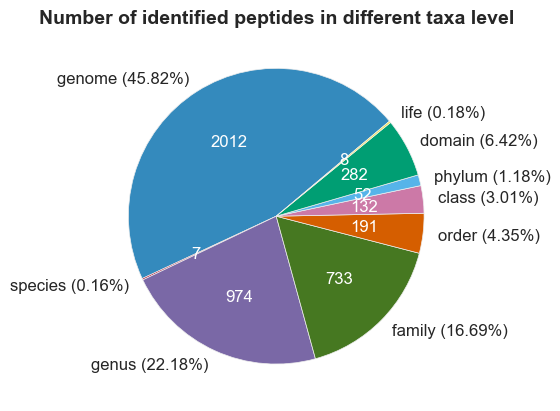

In [21]:
from metax.taxafunc_ploter.basic_plot import BasicPlot

BasicPlot(sw).plot_taxa_stats_pie(theme='bmh')

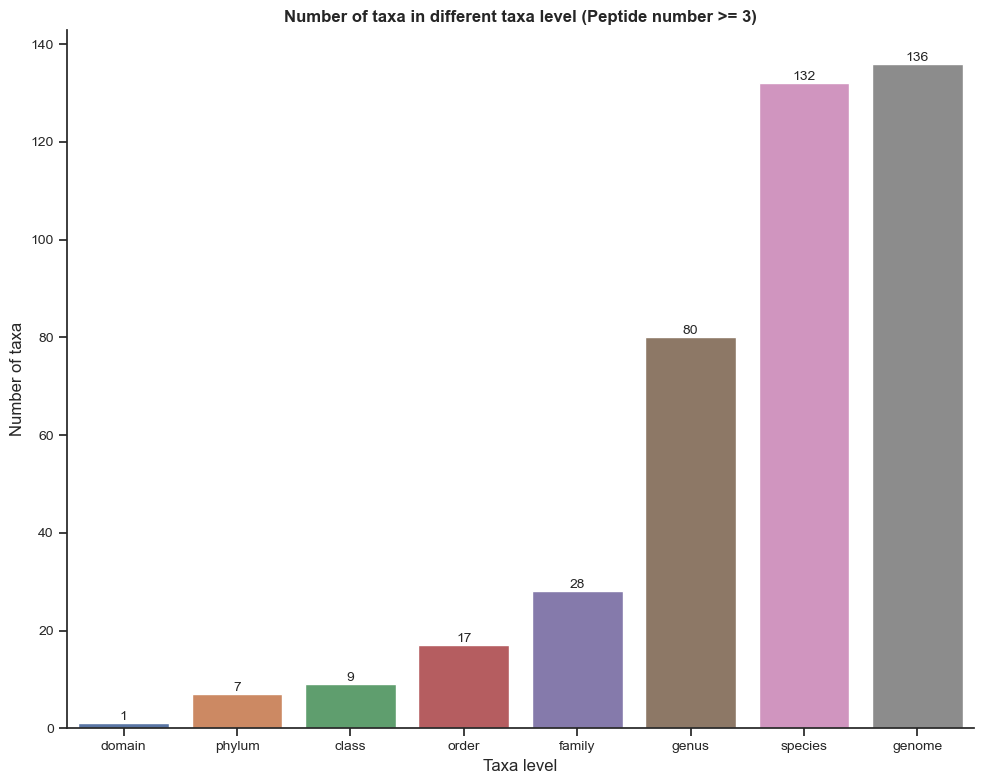

<Axes: title={'center': 'Number of taxa in different taxa level (Peptide number >= 3)'}, xlabel='Taxa level', ylabel='Number of taxa'>

In [22]:
BasicPlot(sw).plot_taxa_number(theme='Auto', peptide_num=3, res_type='show')

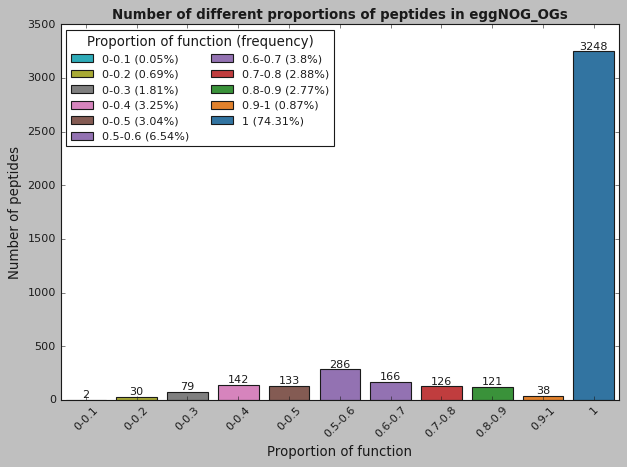

<Axes: title={'center': 'Number of different proportions of peptides in eggNOG_OGs'}, xlabel='Proportion of function', ylabel='Number of peptides'>

In [23]:
BasicPlot(sw).plot_prop_stats(func_name = 'eggNOG_OGs', res_type='show', font_size=10, theme='classic')

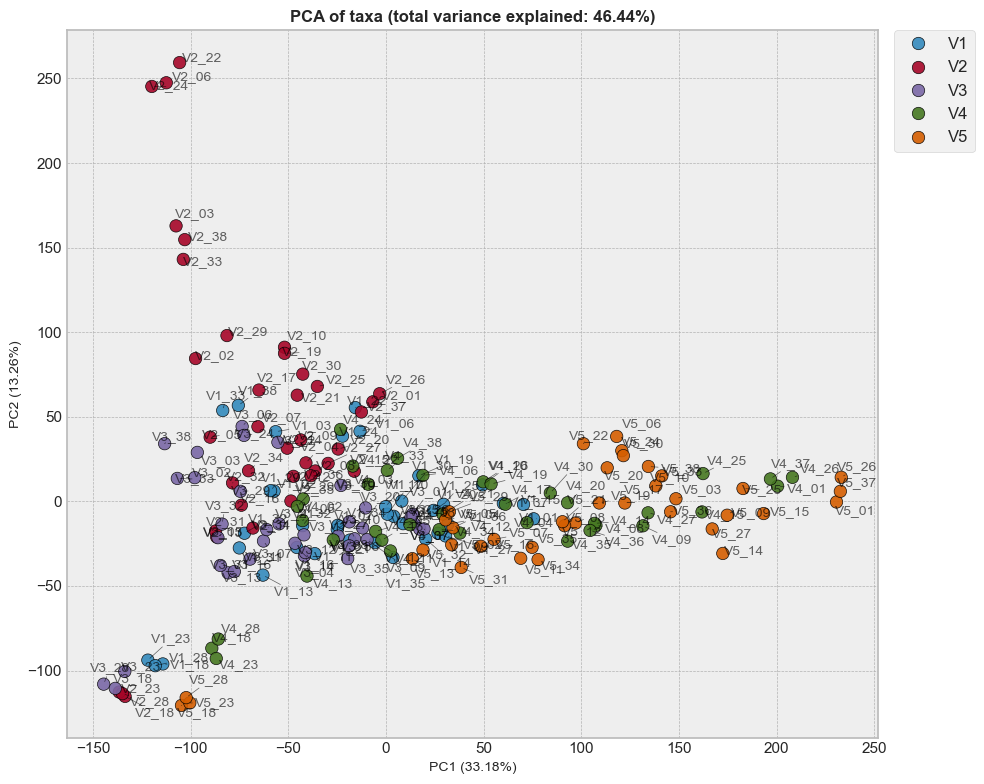

<Axes: title={'center': 'PCA of taxa (total variance explained: 46.44%)'}, xlabel='PC1 (33.18%)', ylabel='PC2 (13.26%)'>

In [24]:
BasicPlot(sw).plot_pca_sns(df=sw.get_df(table_name='taxa'), title_name='taxa', 
                           show_label=True, width=10, height=8, font_size=10, rename_sample=False, 
                           font_transparency=0.6, adjust_label=True, theme='bmh',
                           sub_meta='None', legend_col_num=None, dot_size=None)

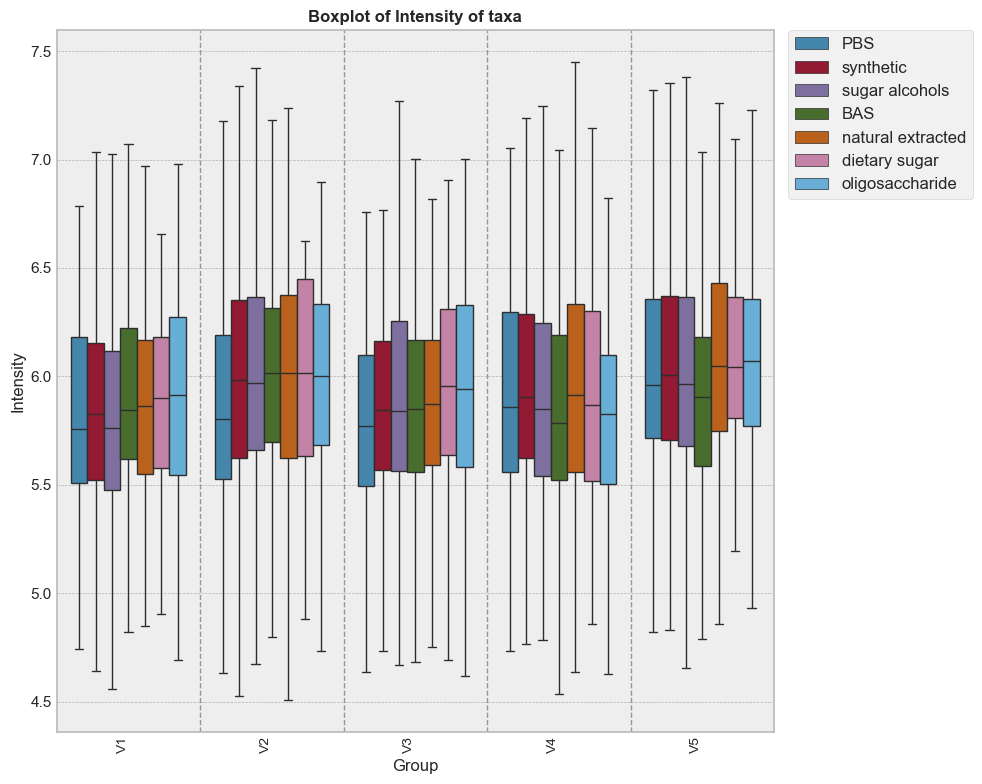

<Axes: title={'center': 'Boxplot of Intensity of taxa'}, xlabel='Group', ylabel='Intensity'>

In [25]:
BasicPlot(sw).plot_box_sns(df=sw.get_df(table_name='taxa_func'), title_name='taxa', show_fliers=False, 
                           width=10, height=8, font_size=10, theme='bmh', rename_sample=False, 
                           plot_samples=False, legend_col_num=1, sub_meta='Sugar_source')

The min number of Functions:
Group SubGroup  Number
   V4      BAS     187
The max number of Functions:
Group SubGroup  Number
   V2      CHO     427


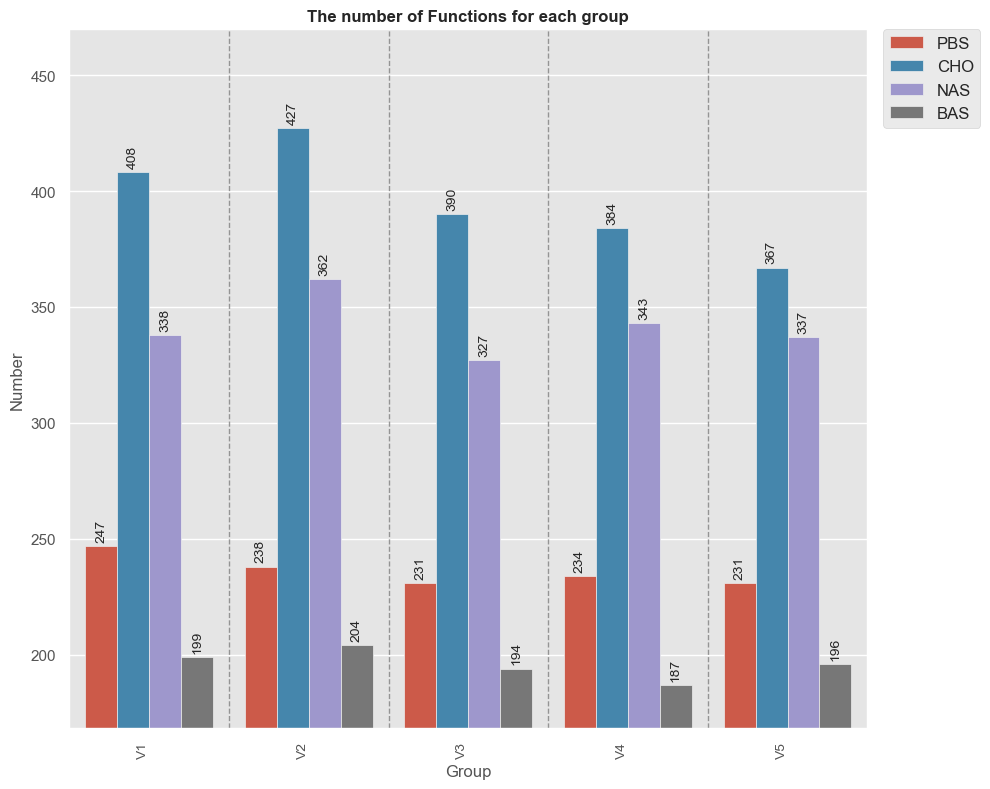

<Axes: title={'center': 'The number of Functions for each group'}, xlabel='Group', ylabel='Number'>

In [26]:
BasicPlot(sw).plot_number_bar(df=sw.get_df(table_name='func'), title_name='Functions', 
                              width=10, height=8, font_size=10, theme='ggplot',
                              plot_sample=False, show_label=True, rename_sample=False, 
                              legend_col_num=None, sub_meta='Sugar_type')

In [27]:
from metax.taxafunc_ploter.heatmap_plot import HeatmapPlot

input group order: ['V1', 'V2', 'V3', 'V4', 'V5']
samples used: ['V1_01', 'V1_02', 'V1_03', 'V1_04', 'V1_05', 'V1_06', 'V1_07', 'V1_08', 'V1_09', 'V1_10', 'V1_11', 'V1_12', 'V1_13', 'V1_14', 'V1_15', 'V1_16', 'V1_17', 'V1_18', 'V1_19', 'V1_20', 'V1_21', 'V1_22', 'V1_23', 'V1_24', 'V1_25', 'V1_26', 'V1_27', 'V1_28', 'V1_29', 'V1_30', 'V1_31', 'V1_32', 'V1_33', 'V1_34', 'V1_35', 'V1_36', 'V1_37', 'V1_38', 'V2_01', 'V2_02', 'V2_03', 'V2_04', 'V2_05', 'V2_06', 'V2_07', 'V2_08', 'V2_09', 'V2_10', 'V2_11', 'V2_12', 'V2_13', 'V2_14', 'V2_15', 'V2_16', 'V2_17', 'V2_18', 'V2_19', 'V2_20', 'V2_21', 'V2_22', 'V2_23', 'V2_24', 'V2_25', 'V2_26', 'V2_27', 'V2_28', 'V2_29', 'V2_30', 'V2_31', 'V2_32', 'V2_33', 'V2_34', 'V2_35', 'V2_36', 'V2_37', 'V2_38', 'V3_01', 'V3_02', 'V3_03', 'V3_04', 'V3_05', 'V3_06', 'V3_07', 'V3_08', 'V3_09', 'V3_10', 'V3_11', 'V3_12', 'V3_13', 'V3_14', 'V3_15', 'V3_16', 'V3_17', 'V3_18', 'V3_19', 'V3_20', 'V3_21', 'V3_22', 'V3_23', 'V3_24', 'V3_25', 'V3_26', 'V3_27', 'V3_28',

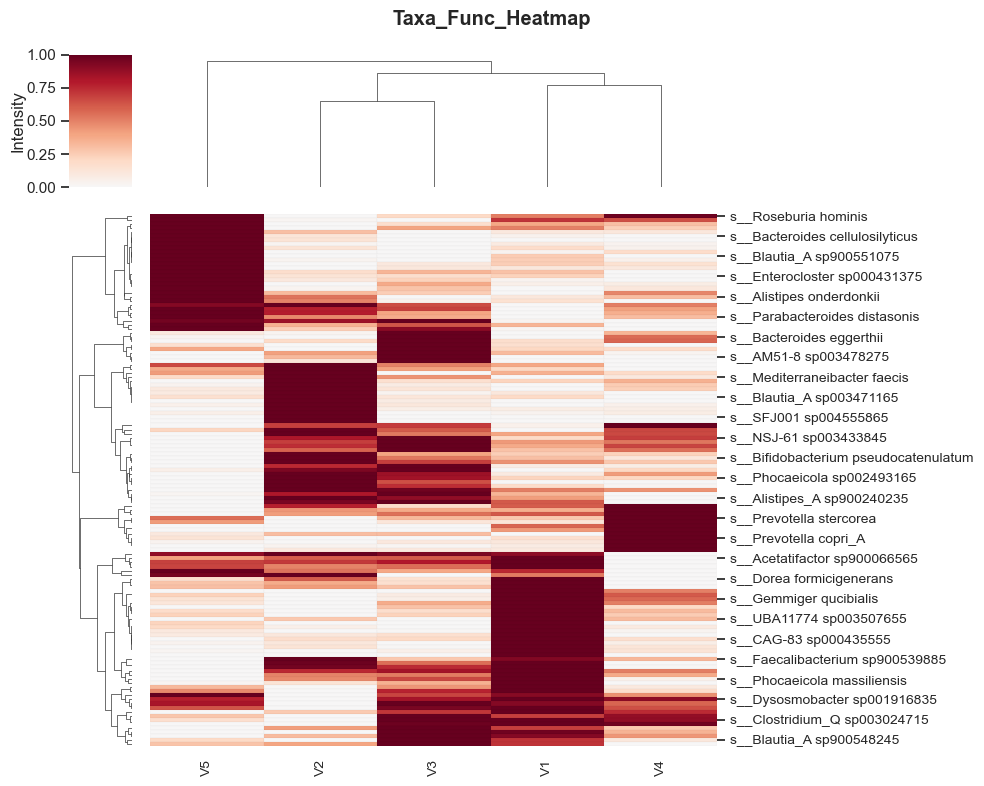

In [28]:

HeatmapPlot(sw).plot_basic_heatmap(df=sw.get_df(table_name='taxa'), title='Taxa_Func_Heatmap',
                                      fig_size=(10, 8), scale='row', col_cluster=True, row_cluster=True, cmap='RdBu_r',
                                      rename_taxa=True, font_size=10, show_all_labels=(False, False), rename_sample=False, plot_mean=True)


## Statistical Analysis

change meta sa "Sugar_type"

In [31]:
sw.set_group('Sugar_type')

group is set to Sugar_type
 {'NAS', 'BAS', 'PBS', 'CHO'}


### T-test, ANOVA, and other statistical tests

Run T-test to compare the "PBS" and "NAS" groups, and only select samples in 'V1' and 'V2' of Individulal.

`condtions`(Optional): The conditions to filter the samples. Default is None.

In [32]:
#TODO: add more examples
df_t_test = sw.CrossTest.get_stats_ttest(group_list = ['PBS', 'NAS'],
                                         df_type = 'taxa-func', 
                                         condition = ['Individual', ['V1', 'V2']])
df_t_test

t-test for taxa-func in ['PBS', 'NAS']


100%|██████████| 1173/1173 [00:03<00:00, 329.37it/s]


P-value   
Taxon                                              KEGG_ko               
d__Archaea|p__Methanobacteriota|c__Methanobacte... ko:K13942  0.680037  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00615       NaN   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K01621  0.900607   
                                                   ko:K02879       NaN   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00656       NaN   
...                                                                ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K03286       NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K02358       NaN   
d__Bacteria|p__Spirochaetota|c__Spirochaetia|o_... ko:K00656       NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... ko:K02886  0.680037   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... ko:K00134       NaN   

                                                              t-statistic   
Taxon                                              KEGG_ko                  
d__Archaea|p__Methanobacteriota|c__Methanobacte... ko:K13942    -0.415605  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00615          NaN   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K01621     0.125732   
                                                   ko:K02879          NaN   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00656          NaN   
...                                                                   ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K03286          NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K02358          NaN   
d__Bacteria|p__Spirochaetota|c__Spirochaetia|o_... ko:K00656          NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... ko:K02886    -0.415605   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... ko:K00134          NaN   

                                                              V1_01  V1_26   
Taxon                                              KEGG_ko                   
d__Archaea|p__Methanobacteriota|c__Methanobacte... ko:K13942    0.0    0.0  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00615    0.0    0.0   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K01621    0.0    0.0   
                                                   ko:K02879    0.0    0.0   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00656    0.0    0.0   
...                                                             ...    ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K03286    0.0    0.0   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K02358    0.0    0.0   
d__Bacteria|p__Spirochaetota|c__Spirochaetia|o_... ko:K00656    0.0    0.0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... ko:K02886    0.0    0.0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... ko:K00134    0.0    0.0   

                                                              V1_37  V2_01   
Taxon                                              KEGG_ko                   
d__Archaea|p__Methanobacteriota|c__Methanobacte... ko:K13942    0.0    0.0  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00615    0.0    0.0   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K01621    0.0    0.0   
                                                   ko:K02879    0.0    0.0   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00656    0.0    0.0   
...                                                             ...    ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K03286    0.0    0.0   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K02358    0.0    0.0   
d__Bacteria|p__Spirochaetota|c__Spirochaetia|o_... ko:K00656    0.0    0.0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... ko:K02886    0.0    0.0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... ko:K00134    0.0    0.0   

                                                                 V2_

Same as ANOVA, but the group is more than two.

In [34]:
df_anova_test = sw.CrossTest.get_stats_anova(group_list = ['PBS', 'NAS', 'CHO'],
                                                df_type = 'taxa', 
                                                condition = None)
df_anova_test

--ANOVA test for Taxon in ['PBS', 'NAS', 'CHO'] with condition: None--


100%|██████████| 132/132 [00:00<00:00, 317.94it/s]


,P-value,f-statistic,V1_01,V1_26,V1_37,V2_01,V2_26,V2_37,V3_01,V3_26,...,V5_11,V5_13,V5_16,V5_22,V5_24,V5_29,V5_31,V5_32,V5_33,V5_38
Taxon,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium breve,9.900382e-01,0.010012,0.000000,0.000000,0.000000,0.000000,5.988315,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium infantis,1.438214e-02,4.348117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,6.100598,5.298259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium pseudocatenulatum,4.131231e-10,24.564016,0.000000,6.096322,0.000000,0.000000,0.000000,6.458960,12.204727,5.865064,...,0.00000,0.000000,0.000000,5.759351,5.307273,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Actinobacteriota|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella sp002232035,9.094473e-01,0.094971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,6.468789,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides bouchesdurhonensis,1.388464e-07,17.332378,5.285019,5.423162,5.359188,5.684381,12.194353,0.000000,5.489452,5.264407,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.225896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria|p__Fusobacteriota|c__Fusobacteriia|o__Fusobacteriales|f__Fusobacteriaceae|g__Fusobacterium_A|s__Fusobacterium_A sp900555485,7.793646e-01,0.249638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Parasutterella|s__Parasutterella sp000980495,3.408515e-01,1.083072,0.000000,0.000000,0.000000,5.770555,5.846073,5.946136,6.110018,6.001110,...,0.00000,0.000000,0.000000,0.000000,0.000000,4.848325,0.000000,0.000000,0.000000,0.000000
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Sutterella|s__Sutterella wadsworthensis_A,5.101041e-01,0.675782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,12.414426,12.342009,11.928377,12.243250,0.000000,6.086147,0.000000,0.000000,0.000000


Tukey's HSD test can be used to find the specific difference between groups after ANOVA.
-   Set `taxon_name` only: calculate all the functions in the taxa.
-   Set `func_name` only: calculate all the taxa in the function.
-   Set `taxon_name` and `func_name`: calculate all peptides in the taxa and function.
-   `sum_all`: 
    -   True: sum all items in the taxa, function or taxa-function frist, then run Tukey's HSD test.
    -   False: run Tukey's HSD test directly for all items in the taxa, function or taxa-function.

In [39]:
df_tukey = sw.CrossTest.get_stats_tukey_test(taxon_name='d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli_D', 
                                             func_name=None, 
                                             sum_all=False, 
                                             condition=['V1', 'V2'])
df_tukey

  group1 group2  meandiff   p-adj   lower   upper  reject significant   
0    BAS    CHO    0.7029  0.1717 -0.1835  1.5892   False          No  \
1    BAS    NAS    0.0000  1.0000 -0.8776  0.8776   False          No   
2    BAS    PBS    0.0000  1.0000 -1.1443  1.1443   False          No   
3    CHO    NAS   -0.7029  0.0018 -1.1993 -0.2064    True         Yes   
4    CHO    PBS   -0.7029  0.1717 -1.5892  0.1835   False          No   
5    NAS    PBS    0.0000  1.0000 -0.8776  0.8776   False          No   

    Function  
0  ko:K00033  
1  ko:K00033  
2  ko:K00033  
3  ko:K00033  
4  ko:K00033  
5  ko:K00033  
  group1 group2  meandiff   p-adj   lower   upper  reject significant   
0    BAS    CHO    0.7029  0.1717 -0.1835  1.5892   False          No  \
1    BAS    NAS    0.0000  1.0000 -0.8776  0.8776   False          No   
2    BAS    PBS    0.0000  1.0000 -1.1443  1.1443   False          No   
3    CHO    NAS   -0.7029  0.0018 -1.1993 -0.2064    True         Yes   
4    CHO    PBS   

,group1,group2,meandiff,p-adj,lower,upper,reject,significant,Function
0,BAS,CHO,0.7029,0.1717,-0.1835,1.5892,False,No,ko:K00033
1,BAS,NAS,0.0000,1.0000,-0.8776,0.8776,False,No,ko:K00033
2,BAS,PBS,0.0000,1.0000,-1.1443,1.1443,False,No,ko:K00033
3,CHO,NAS,-0.7029,0.0018,-1.1993,-0.2064,True,Yes,ko:K00033
4,CHO,PBS,-0.7029,0.1717,-1.5892,0.1835,False,No,ko:K00033
...,...,...,...,...,...,...,...,...,...
1,BAS,NAS,0.0000,1.0000,-0.8601,0.8601,False,No,ko:K12147
2,BAS,PBS,0.0000,1.0000,-1.1214,1.1214,False,No,ko:K12147
3,CHO,NAS,-0.6885,0.0018,-1.1750,-0.2020,True,Yes,ko:K12147
4,CHO,PBS,-0.6885,0.1720,-1.5571,0.1801,False,No,ko:K12147


PyDeseq2 is used to analyze the differential expression of taxa and functions.

In [35]:
df_deseq2 = sw.CrossTest.get_stats_deseq2(df = sw.get_df(table_name='taxa_func'),
                                            group1 = 'PBS', group2 = 'NAS', condition = ['Individual', ['V1', 'V2']])
df_deseq2


--Running Deseq2 [PBS] vs [NAS] with condition: [['Individual', ['V1', 'V2']]]--
group1 [PBS]:
['V1_01', 'V1_26', 'V1_37', 'V2_01', 'V2_26', 'V2_37']

group2 [NAS]:
['V1_07', 'V1_08', 'V1_09', 'V1_10', 'V1_12', 'V1_14', 'V1_15', 'V1_17', 'V1_19', 'V1_20', 'V1_21', 'V1_25', 'V1_27', 'V1_30', 'V1_34', 'V1_35', 'V1_36', 'V2_07', 'V2_08', 'V2_09', 'V2_10', 'V2_12', 'V2_14', 'V2_15', 'V2_17', 'V2_19', 'V2_20', 'V2_21', 'V2_25', 'V2_27', 'V2_30', 'V2_34', 'V2_35', 'V2_36']

The max value is [30.578213874665728], not larger than int32, no need to divide


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.29 seconds.

Fitting dispersion trend curve...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.22 seconds.

Fitting LFCs...
... done in 0.17 seconds.

Replacing 2 outlier genes.

Running Wald tests...


Log2 fold change & Wald test p-value: Sugar-type PBS vs NAS
                                                    baseMean  log2FoldChange   
Taxa-Func                                                                      
d__Archaea|p__Methanobacteriota|c__Methanobacte...  0.120989       -0.449848  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.000000             NaN   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.796159        0.149505   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.000000             NaN   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.000000             NaN   
...                                                      ...             ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...  0.000000             NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...  0.000000             NaN   
d__Bacteria|p__Spirochaetota|c__Spirochaetia|o_...  0.000000             NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  0.134817

... done in 0.26 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,V1_01,V1_26,V1_37,V2_01,...,V2_17,V2_19,V2_20,V2_21,V2_25,V2_27,V2_30,V2_34,V2_35,V2_36
Taxa-Func,,,,,,,,,,,,,,,,,,,,,
d__Archaea|p__Methanobacteriota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter_A|s__Methanobrevibacter_A smithii <ko:K13942>,0.120989,0.449848,4.296912,-0.104691,0.916621,0.949468,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium adolescentis <ko:K00615>,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium breve <ko:K01621>,0.796159,-0.149505,3.245059,0.046072,0.963253,0.975409,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.980081,0.0,5.990444,0.0,0.0,0.0
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium breve <ko:K02879>,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
d__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium infantis <ko:K00656>,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Klebsiella_A|s__Klebsiella_A grimontii <ko:K03286>,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Pseudomonadaceae|g__Pseudomonas_E|s__Pseudomonas_E massiliensis <ko:K02358>,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
d__Bacteria|p__Spirochaetota|c__Spirochaetia|o__Treponematales|f__Treponemataceae|g__Treponema_D|s__Treponema_D sp900541995 <ko:K00656>,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


### Functioncal Redundancy Analysis
Find taxa not significant but related function significant or vice versa.

In [43]:
taxa_func_sig = sw.CrossTest.get_stats_diff_taxa_but_func(
    group_list=["PBS", "NAS"],
    p_value=0.05,
    condition=["Individual", ["V1"]]
)
print("The taxa not significant but related function significant")
df1 = taxa_func_sig[0]
display(df1)
print("The taxa significant but related function not significant")
df2 = taxa_func_sig[1]
display(df2)

No test result given, calculating the test result first
--Calculating t-test for ['PBS', 'NAS'] with condition: ['Individual', ['V1']]--
t-test for Taxon in ['PBS', 'NAS'] with condition: ['Individual', ['V1']]


100%|██████████| 132/132 [00:00<00:00, 254.74it/s]


t-test for KEGG_ko in ['PBS', 'NAS'] with condition: ['Individual', ['V1']]


100%|██████████| 602/602 [00:01<00:00, 367.96it/s]


t-test for taxa-func in ['PBS', 'NAS']


100%|██████████| 1173/1173 [00:03<00:00, 389.46it/s]

Under P-value = 0.05: 
               Significant Taxa: [57], Not Significant Taxa: [75]
Under P-value = 0.05: 
                 Significant Function: [329], Not Significant Function: [273]
Taxa not significant but related function significant with P-value <= 0.05: [18]
Function not significant but related taxa significant with P-value <= 0.05: [21]
Returning a tuple of two dataframesthe:
             1. the taxa not significant but related function significant
             2. the function not significant but related taxa significant
The taxa not significant but related function significant


P-value   
Taxon                                              KEGG_ko                             
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K04072,ko:K15515  1.273367e-02  \
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02437            1.273367e-02   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835            3.174183e-32   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01802,ko:K03770  4.254712e-03   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K00053            3.555286e-35   
                                                   ko:K01889            6.417112e-06   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01847            7.602655e-03   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134            8.120040e-03   
                                                   ko:K21576            1.273367e-02   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K01999            5.172708e-03   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K01006            4.347029e-02   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... ko:K02035            1.651891e-02   
                                                   ko:K18012            1.039865e-02   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K00111            1.273367e-02   
                                                   ko:K01872            1.273367e-02   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K00134            3.789293e-02   
                                                   ko:K00656            1.833153e-02   
                                                   ko:K02926            2.525507e-04   

                                                                        t-statistic   
Taxon                                              KEGG_ko                            
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K04072,ko:K15515     2.765863  \
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02437               2.765863   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835             217.177829   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01802,ko:K03770     3.269894   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K00053             316.802189   
                                                   ko:K01889               6.277436   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01847               3.004978   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K00134               2.974682   
                                                   ko:K21576               2.765863   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K01999               3.181119   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... ko:K01006               2.171904   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... ko:K02035               2.643362   
                                                   ko:K18012               2.860299   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K00111               2.765863   
                                                   ko:K01872               2.765863   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... ko:K00134               2.240741   
                                                   ko:K00656               2.593936   
                                                   ko:K02926               4.541922   

                                                                            V1_01   
Taxon                                              KEGG_ko                          
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K04072,ko:K15515   0.000000  \
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K02437             6.072586   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01835             6.134028   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K01802,ko:K03770   6.233689   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... ko:K00053     

The taxa significant but related function not significant


P-value   
KEGG_ko             Taxon                                                              
ko:K00111           d__Bacteria|p__Proteobacteria|c__Gammaproteobac...  1.273367e-02  \
ko:K00179           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  2.748872e-02   
ko:K00248           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  1.273367e-02   
ko:K00656           d__Bacteria|p__Proteobacteria|c__Gammaproteobac...  1.833153e-02   
ko:K01710           d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  1.273367e-02   
ko:K01870           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  2.561767e-02   
ko:K01952           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  2.017561e-02   
ko:K02035           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1.273367e-02   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  1.651891e-02   
ko:K02355           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  7.427231e-03   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  2.727573e-39   
ko:K02863           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1.273367e-02   
ko:K02967           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  4.414843e-02   
ko:K02994           d__Bacteria|p__Firmicutes|c__Bacilli|o__RF39|f_...  1.273367e-02   
ko:K03043           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1.273367e-02   
ko:K03737           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  1.273367e-02   
ko:K04072,ko:K15515 d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  1.273367e-02   
ko:K04079           d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  4.892731e-03   
ko:K10117           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  1.273367e-02   
ko:K14949           d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  2.442230e-03   
ko:K21577           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1.273367e-02   

                                                                        t-statistic   
KEGG_ko             Taxon                                                             
ko:K00111           d__Bacteria|p__Proteobacteria|c__Gammaproteobac...     2.765863  \
ko:K00179           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     2.398902   
ko:K00248           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...     2.765863   
ko:K00656           d__Bacteria|p__Proteobacteria|c__Gammaproteobac...     2.593936   
ko:K01710           d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...     2.765863   
ko:K01870           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     2.433175   
ko:K01952           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...     2.548199   
ko:K02035           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     2.765863   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...     2.643362   
ko:K02355           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     3.015706   
                    d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...   536.325963   
ko:K02863           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     2.765863   
ko:K02967           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     2.164094   
ko:K02994           d__Bacteria|p__Firmicutes|c__Bacilli|o__RF39|f_...     2.765863   
ko:K03043           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     2.765863   
ko:K03737           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...     2.765863   
ko:K04072,ko:K15515 d__Bacteria|p__Actinobacteriota|c__Actinomyceti...     2.765863   
ko:K04079           d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...     3.206439   
ko:K10117           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...     2.765863   
ko:K14949           d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...     3.520630   
ko:K21577           d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     2.765863   

                                                  

### Comapre multiple groups to Control Group

In [44]:
# Dunntest
df_dunnett = sw.CrossTest.get_stats_dunnett_test(
    control_group="PBS", # set the control group
    group_list=["NAS", "CHO"], # set the test group, at least two groups
    df_type="taxa-func",
    condition=["Individual", ["V1", "V2"]],
)
df_dunnett.head()


Dunnett's test for taxa-func in ['CHO', 'NAS'] with condition: ['Individual', ['V1', 'V2']]
control group: PBS
primary index: Taxon
secondary index: KEGG_ko


100%|██████████| 1173/1173 [00:13<00:00, 85.95it/s]


CHO   
                                                                pvalue   
Taxon                                              KEGG_ko               
d__Archaea|p__Methanobacteriota|c__Methanobacte... ko:K13942  1.000000  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00615  1.000000   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K01621  0.806127   
                                                   ko:K02879  0.683507   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00656  0.683488   

                                                                         
                                                             statistic   
Taxon                                              KEGG_ko               
d__Archaea|p__Methanobacteriota|c__Methanobacte... ko:K13942  0.000000  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00615       NaN   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K01621 -0.450417   
                                                   ko:K02879  0.620530   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00656  0.620530   

                                                                   NAS   
                                                                pvalue   
Taxon                                              KEGG_ko               
d__Archaea|p__Methanobacteriota|c__Methanobacte... ko:K13942  0.733418  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00615  1.000000   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K01621  0.978816   
                                                   ko:K02879  1.000000   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00656  1.000000   

                                                                        
                                                             statistic  
Taxon                                              KEGG_ko              
d__Archaea|p__Methanobacteriota|c__Methanobacte... ko:K13942  0.551856  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00615       NaN  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K01621 -0.135500  
                                                   ko:K02879  0.000000  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti... ko:K00656  0.000000

In [47]:
# Deseq2
df_deseq2_against_control = sw.CrossTest.get_stats_deseq2_against_control(
    df=sw.get_df(table_name='taxa'),
    control_group="PBS",
    group_list=["NAS", "CHO"],
    concat_sample_to_result = False,
    condition=["Individual", ["V1", "V2"]],
)


df_deseq2_against_control.head()


-------------Start to compare [PBS] and [NAS]----------------


--Running Deseq2 [PBS] vs [NAS] with condition: [['Individual', ['V1', 'V2']]]--
group1 [PBS]:
['V1_01', 'V1_26', 'V1_37', 'V2_01', 'V2_26', 'V2_37']

group2 [NAS]:
['V1_07', 'V1_08', 'V1_09', 'V1_10', 'V1_12', 'V1_14', 'V1_15', 'V1_17', 'V1_19', 'V1_20', 'V1_21', 'V1_25', 'V1_27', 'V1_30', 'V1_34', 'V1_35', 'V1_36', 'V2_07', 'V2_08', 'V2_09', 'V2_10', 'V2_12', 'V2_14', 'V2_15', 'V2_17', 'V2_19', 'V2_20', 'V2_21', 'V2_25', 'V2_27', 'V2_30', 'V2_34', 'V2_35', 'V2_36']

The max value is [176.89062622369502], not larger than int32, no need to divide


Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



Log2 fold change & Wald test p-value: Sugar-type PBS vs NAS
                                                     baseMean  log2FoldChange   
Taxon                                                                           
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   0.771977       -0.477499  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   1.292352       -3.648623   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   0.983491        0.606517   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...   0.535629       -2.306556   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   1.365652        1.794164   
...                                                       ...             ...   
d__Bacteria|p__Fusobacteriota|c__Fusobacteriia|...   0.281938       -1.462418   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   1.812603        0.021786   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   0.985583       -3.259181   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac..

Fitting dispersions...
... done in 0.00 seconds.

Fitting MAP dispersions...
... done in 0.00 seconds.

Fitting LFCs...
... done in 0.00 seconds.



NAS                  
                                                    baseMean log2FoldChange   
Taxon                                                                         
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.771977       0.477499  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  1.292352       3.648623   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.983491      -0.606517   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  0.535629       2.306556   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  1.365652      -1.794164   

                                                                         
                                                       lfcSE      stat   
Taxon                                                                    
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  2.918570 -0.163607  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  3.364680 -1.084390   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  2.615725  0.231873   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  4.281428 -0.538735   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  1.956116  0.917207   

                                                                         
                                                      pvalue      padj   
Taxon                                                                    
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.870040  0.977674  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.278192  0.968992   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.816636  0.968992   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  0.590070  0.968992   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  0.359034  0.968992   

                                                          CHO                  
                                                     baseMean log2FoldChange   
Taxon                                                                          
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   0.758785      -0.161174  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   2.915159       4.312093   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  11.314505       2.676850   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...   0.162847       0.678586   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...   1.234133      -3.549934   

                                                                         
                                                       lfcSE      stat   
Taxon                                                                    
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  3.532727  0.045623  \
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  2.321713 -1.857290   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.923952 -2.897173   
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  4.140640 -0.163884   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  2.168188  1.637281   

                                                                        
                                                      pvalue      padj  
Taxon                                                                   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.963611  0.989596  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.063270  0.407300  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  0.003765  0.096959  
d__Bacteria|p__Actinobacteriota|c__Coriobacteri...  0.869822  0.973239  
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  0.101572  0.550625

### All the results can be plot easily by `taxafunc_ploter`

In [49]:
from metax.taxafunc_ploter.heatmap_plot import HeatmapPlot
from metax.taxafunc_ploter.volcano_plot_js import VolcanoPlot
from metax.taxafunc_ploter.tukey_plot import TukeyPlot
from metax.taxafunc_ploter.sankey_plot import SankeyPlot



RESULT:
Number of significant rows: 94
Top [100] significant: Taxa (50), Functions (72)


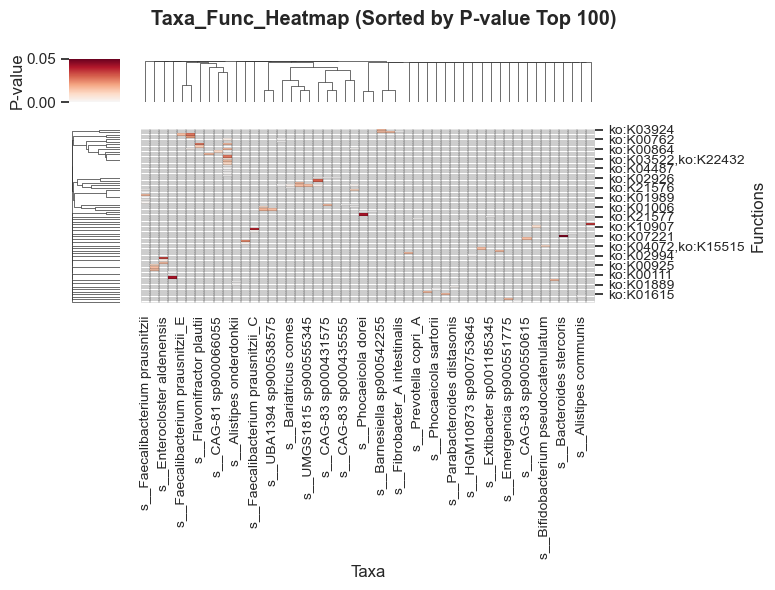

In [62]:
# plot_basic_heatmap_of_test_res for t_test of taxa and func, and other test results
# plot_top_taxa_func_heatmap_of_test_res only for t_test of taxa-func
HeatmapPlot(sw).plot_top_taxa_func_heatmap_of_test_res(
    df=df_t_test,
    top_number=100,
    value_type="p", # or "t" for the t-statistic value
    fig_size=(8, 6),
    pvalue=0.05,
    col_cluster=True,
    row_cluster=True,
    cmap="RdBu_r",
    rename_taxa=True,
    font_size=10,
    title="Taxa_Func_Heatmap",
    show_all_labels=(False, False),
    return_type="fig",
)


# Link Taxa and Functions

## Get the matrix of taxa and functions

In [79]:
# input: a taxon with its function, a function with its taxon,
# and the peptides in the function or taxon
# output: a matrix of the intensity of the taxon or function or peptide in each sample
df_func_in_taxon = sw.GetMatrix.get_intensity_matrix(
    func_name=None,
    taxon_name="d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli_D",
    sample_list =["V1_01", "V5_02"],
)
df_func_in_taxon.head()


,V1_01,V5_02
KEGG_ko,,
ko:K00033,0.000000,0.0
ko:K00134,6.083099,0.0
ko:K00163,0.000000,0.0
"ko:K00297,ko:K10901",0.000000,0.0
ko:K00549,0.000000,0.0


In [80]:
df_taxa_in_fun = sw.GetMatrix.get_intensity_matrix(
    func_name="ko:K00134",
    taxon_name=None,
    # sample_list =["V1_01", "V5_02"],
    condition=["Individual", ["V3", "V4"]],
)
df_taxa_in_fun.head()

group_list not provided, using all groups in meta_df.


,V3_01,V3_26,V3_37,V4_01,V4_26,V4_37,V3_02,V3_03,V3_04,V3_05,...,V4_30,V4_34,V4_35,V4_36,V3_18,V3_23,V3_28,V4_18,V4_23,V4_28
Taxon,,,,,,,,,,,,,,,,,,,,,
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Prevotella|s__Prevotella stercorea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes_A|s__Alistipes_A sp900240235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes provencensis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d__Bacteria|p__Firmicutes_A|c__Clostridia_A|o__Christensenellales|f__CAG-314|g__CAG-1435|s__CAG-1435 sp003537755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Anaerotignaceae|g__UMGS1670|s__UMGS1670 sp900548595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# output: a matrix of the intensity of the taxon or function or peptide in each sample
df_peptides_in_taxa_func = sw.GetMatrix.get_intensity_matrix(
    func_name="ko:K00134",
    taxon_name="d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A|s__Blautia_A caecimuris",
    sample_list =["V1_01", "V1_02"],
)
df_peptides_in_taxa_func.head()


,V1_01,V1_02
Sequence,,
AASNE(Cation_Ca[II])SFGYNEDEIVSSDIVGMK,0.00000,0.00000
AASNE(Cation_Fe[II])SFGYNEDEIVSSDIVGMK,0.00000,0.00000
AASNESFGYN(Deamidated)EDEIVSSDIVGMK,0.00000,0.00000
AASNESFGYNE(Cation_Na)DEIVSSDIVGMK,0.00000,0.00000
AASNESFGYNED(Cation_Ca[II])EIVSSDIVGMK,5.39815,5.46177


In [84]:
# get the intensity matrix of a peptide

sw.GetMatrix.get_intensity_matrix(
    peptide_seq = 'AASNE(Cation_Fe[II])SFGYNEDEIVSSDIVGMK',
)

,V1_01,V1_02,V1_03,V1_04,V1_05,V1_06,V1_07,V1_08,V1_09,V1_10,...,V5_29,V5_30,V5_31,V5_32,V5_33,V5_34,V5_35,V5_36,V5_37,V5_38
Sequence,,,,,,,,,,,,,,,,,,,,,
AASNE(Cation_Fe[II])SFGYNEDEIVSSDIVGMK,0,0,0,0,0,0,0,0,0,0,...,1578028,0,0,1038678,0,0,0,0,0,797216
